**1. Data Understanding & Preprocessing**

pada understanding dan preprocessing memuat menginportan library dan memuat datset yang digunakan.
data understanding dan processing juga memuat pengenalan dataset atau memberikan informasi seputar dataset, pengecheckan nilai null pada dataset dan process lainnya sebelum mengolah data

In [ ]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Memuat data
file_path = '/content/Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama untuk memeriksa data
print("Data yang dimuat:")
print(data.head())

Data yang dimuat:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                             address  PlaceID  \
0  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
1  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
2  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
3  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   
4  Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...        0   

          Nama_tempat_wisata       Category    ReviewerId  Rating  \
0  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.126030e+20     5.0   
1  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.119090e+20     5.0   
2  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.078860e+20     5.0   
3  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.130720e+20     5.0   
4  PASIR PUTIH LUMBAN BULBUL  Wisata Bahari  1.061730e+20  

In [ ]:
# Informasi data
print("\nInformasi data:")
print(data.info())


Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43226 entries, 0 to 43225
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43226 non-null  int64  
 1   Unnamed: 0          43226 non-null  int64  
 2   address             43226 non-null  object 
 3   PlaceID             43226 non-null  int64  
 4   Nama_tempat_wisata  43226 non-null  object 
 5   Category            43226 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
 8   Reviews             22166 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB
None


In [ ]:
# Informasi data
print("\nInformasi data:")
print(data.info())


Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43226 entries, 0 to 43225
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43226 non-null  int64  
 1   Unnamed: 0          43226 non-null  int64  
 2   address             43226 non-null  object 
 3   PlaceID             43226 non-null  int64  
 4   Nama_tempat_wisata  43226 non-null  object 
 5   Category            43226 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
 8   Reviews             22166 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.0+ MB
None


In [ ]:
# Mengecek distribusi rating
print("\nDistribusi Rating:")
print(data['Rating'].describe())


Distribusi Rating:
count    43225.000000
mean         4.480949
std          0.927760
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


In [ ]:
# Periksa nilai null di data
print("\nJumlah Missing Values:")
print(data.isna().sum())


Jumlah Missing Values:
Unnamed: 0.1              0
Unnamed: 0                0
address                   0
PlaceID                   0
Nama_tempat_wisata        0
Category                  0
ReviewerId                1
Rating                    1
Reviews               21060
dtype: int64


In [ ]:
# Hapus baris dengan missing values pada ReviewerId dan Rating
data_cleaned = data.dropna(subset=['ReviewerId', 'Rating'])

# Konfirmasi hasil
print("Jumlah Missing Values setelah pembersihan:")
print(data_cleaned[['ReviewerId', 'Rating']].isna().sum())


Jumlah Missing Values setelah pembersihan:
ReviewerId    0
Rating        0
dtype: int64


In [ ]:
# Hapus kolom Reviews karena tidak digunakan
data_cleaned = data_cleaned.drop(columns=['Reviews'])

# Konfirmasi data
print("\nData setelah kolom Reviews dihapus:")
print(data_cleaned.info())



Data setelah kolom Reviews dihapus:
<class 'pandas.core.frame.DataFrame'>
Index: 43225 entries, 0 to 43225
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        43225 non-null  int64  
 1   Unnamed: 0          43225 non-null  int64  
 2   address             43225 non-null  object 
 3   PlaceID             43225 non-null  int64  
 4   Nama_tempat_wisata  43225 non-null  object 
 5   Category            43225 non-null  object 
 6   ReviewerId          43225 non-null  float64
 7   Rating              43225 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 3.0+ MB
None


In [ ]:
# Encode PlaceID dan ReviewerId menjadi numerik
place_encoder = LabelEncoder()
reviewer_encoder = LabelEncoder()

data_cleaned['PlaceID_encoded'] = place_encoder.fit_transform(data_cleaned['PlaceID'])
data_cleaned['ReviewerId_encoded'] = reviewer_encoder.fit_transform(data_cleaned['ReviewerId'])

# Konfirmasi hasil encoding
print(data_cleaned[['PlaceID', 'PlaceID_encoded']].head())

   PlaceID  PlaceID_encoded
0        0                0
1        0                0
2        0                0
3        0                0
4        0                0


**2. Pembagian Data**

pembagian data digunakan untuk membagi dataset menjadi tiga subset, yaitu data Training, Validation, dan Testing dengan proporsi tertentu. Pertama, ditentukan ukuran dari masing-masing subset berdasarkan persentase: 70% data akan digunakan untuk training, 15% untuk validation, dan sisa 15% untuk testing. Variabel train_size dihitung sebagai 70% dari total data, val_size dihitung sebagai 15% dari total data, dan test_size dihitung sebagai sisa dari total data setelah dikurangi train_size dan val_size.

Setelah menentukan ukuran untuk setiap subset, data kemudian dibagi sesuai indeks. Data Training (train_df) diambil dari baris awal hingga train_size, sedangkan data Validation (val_df) diambil mulai dari train_size hingga train_size + val_size. Data Testing (test_df) mencakup sisa data mulai dari train_size + val_size hingga baris terakhir dataset.

In [ ]:
from sklearn.model_selection import train_test_split

# Pilih fitur dan label
X = data_cleaned[['PlaceID_encoded', 'ReviewerId_encoded']]
y = data_cleaned['Rating']

# Split data: Train, Validation, Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Train: 30257, Validation: 6484, Test: 6484


In [ ]:
# Normalisasi target (Rating) ke skala 1-5
y_train_normalized = (y_train - 1) / 4.0  # Normalisasi ke rentang [1,5]
y_val_normalized = (y_val - 1) / 4.0
y_test_normalized = (y_test - 1) / 4.0


**3. Model Recommendation System**

**Alternating Least Squares (ALS)**

Alternating Least Squares (ALS) merupakan sebuah algoritma yang digunakan untuk memecahkan masalah dalam sistem rekomendasi, khususnya pada Collaborative Filtering. ALS banyak digunakan dalam aplikasi rekomendasi, seperti Netflix, Amazon, dan Spotify, untuk memprediksi item apa yang mungkin disukai oleh pengguna berdasarkan preferensi yang telah ada. Alternating Least Squares (ALS) adalah teknik model-based Collaborative Filtering yang menggunakan optimasi berbasis least squares untuk melakukan matrix factorization dan membuat rekomendasi Dalam konteks ini, ALS digunakan untuk menemukan latent factors yang mewakili preferensi pengguna dan karakteristik item.

In [ ]:
# 2. Model recommendation dengan regularization dan output linear
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

place_input = Input(shape=(1,), name='place_input')
reviewer_input = Input(shape=(1,), name='reviewer_input')

# Embedding Layer
place_embedding = Embedding(input_dim=X['PlaceID_encoded'].nunique()+1, output_dim=8)(place_input)
reviewer_embedding = Embedding(input_dim=X['ReviewerId_encoded'].nunique()+1, output_dim=8)(reviewer_input)

# Flatten Embedding
place_flatten = Flatten()(place_embedding)
reviewer_flatten = Flatten()(reviewer_embedding)

# Gabungkan kedua embedding
concat = Concatenate()([place_flatten, reviewer_flatten])

# Fully Connected Layers
dense1 = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(concat)
dropout1 = Dropout(0.2)(dense1)  # Menambahkan dropout
dense2 = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.2)(dense2)  # Menambahkan dropout
output = Dense(1, activation='linear')(dropout2)  # Output Predicted Rating dalam rentang 0-1

# Definisi Model
model = Model(inputs=[place_input, reviewer_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ place_input (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reviewer_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 1, 8)           │            816 │ place_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 1, 8)           │        120,096 │ reviewer_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 8)              │              0 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 8)              │              0 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 16)             │              0 │ flatten_4[0][0],       │
│ (Concatenate)             │                        │                │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │          2,176 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64)             │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 1)              │             65 │ dropout_1[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 131,409 (513.32 KB)

 Trainable params: 131,409 (513.32 KB)

 Non-trainable params: 0 (0.00 B)

Hasil pelatihan model menunjukkan perkembangan performa yang signifikan selama beberapa epoch awal, namun mulai mengalami stagnasi dan fluktuasi di tengah hingga akhir pelatihan. Pada epoch pertama, nilai **loss** sebesar 0.3829 dan **val_loss** sebesar 0.0526 menunjukkan bahwa model belum sepenuhnya belajar pola dari data, yang tercermin pula dari nilai **mae** sebesar 0.2611 dan **val_mae** sebesar 0.1754. Seiring pelatihan, model secara bertahap meningkatkan akurasi prediksinya, ditandai dengan penurunan nilai **loss** dan **mae** hingga sekitar epoch ke-6. Pada titik ini, nilai **val_loss** mencapai 0.0649, sedangkan **val_mae** berada di angka 0.1736, yang menunjukkan performa validasi masih cukup baik.

Namun, setelah epoch ke-6, terlihat indikasi **overfitting**, di mana nilai **loss** pada data pelatihan terus menurun, tetapi **val_loss** dan **val_mae** mulai menunjukkan fluktuasi dan bahkan sedikit meningkat pada beberapa epoch berikutnya. Fenomena ini menunjukkan bahwa model terlalu "terlatih" pada data pelatihan, sehingga tidak mampu menangkap pola umum pada data validasi. Pada akhir pelatihan (epoch ke-20), model mencapai nilai **loss** sebesar 0.0328 dan **mae** sebesar 0.1164 pada data pelatihan, sementara performa validasi berada pada nilai **val_loss** sebesar 0.0620 dan **val_mae** sebesar 0.1686.

Secara keseluruhan, model memiliki akurasi prediksi yang cukup baik, tetapi masih perlu dilakukan beberapa penyesuaian untuk mencegah overfitting. Solusi seperti penerapan **regularisasi** (misalnya, dropout atau L1/L2 regularization), **early stopping**, atau penambahan data pelatihan dapat meningkatkan generalisasi model. Meskipun begitu, nilai **mae** pada data validasi menunjukkan bahwa model cukup mampu menangani prediksi dengan tingkat kesalahan yang relatif kecil, menjadikannya solusi yang potensial untuk masalah yang sedang dihadapi.

In [ ]:
# Training
history = model.fit(
    [X_train['PlaceID_encoded'], X_train['ReviewerId_encoded']], y_train_normalized,
    validation_data=([X_val['PlaceID_encoded'], X_val['ReviewerId_encoded']], y_val_normalized),
    epochs=20,  # Menambah epoch untuk konvergensi yang lebih baik
    batch_size=32
)

Epoch 1/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.3829 - mae: 0.2611 - val_loss: 0.0526 - val_mae: 0.1754
Epoch 2/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0581 - mae: 0.1794 - val_loss: 0.0527 - val_mae: 0.1703
Epoch 3/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0574 - mae: 0.1710 - val_loss: 0.0542 - val_mae: 0.1668
Epoch 4/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0494 - mae: 0.1450 - val_loss: 0.0558 - val_mae: 0.1653
Epoch 5/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0433 - mae: 0.1322 - val_loss: 0.0608 - val_mae: 0.1538
Epoch 6/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0401 - mae: 0.1253 - val_loss: 0.0649 - val_mae: 0.1736
Epoch 7/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0388 - mae: 0.1231 - val_loss: 0.0607 - val_mae: 0.1696
Epoch 8/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0362 - mae: 0.1191 - val_loss: 0.0597 - val_mae: 0.1576
Epoch 9/20
946/946 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - lo

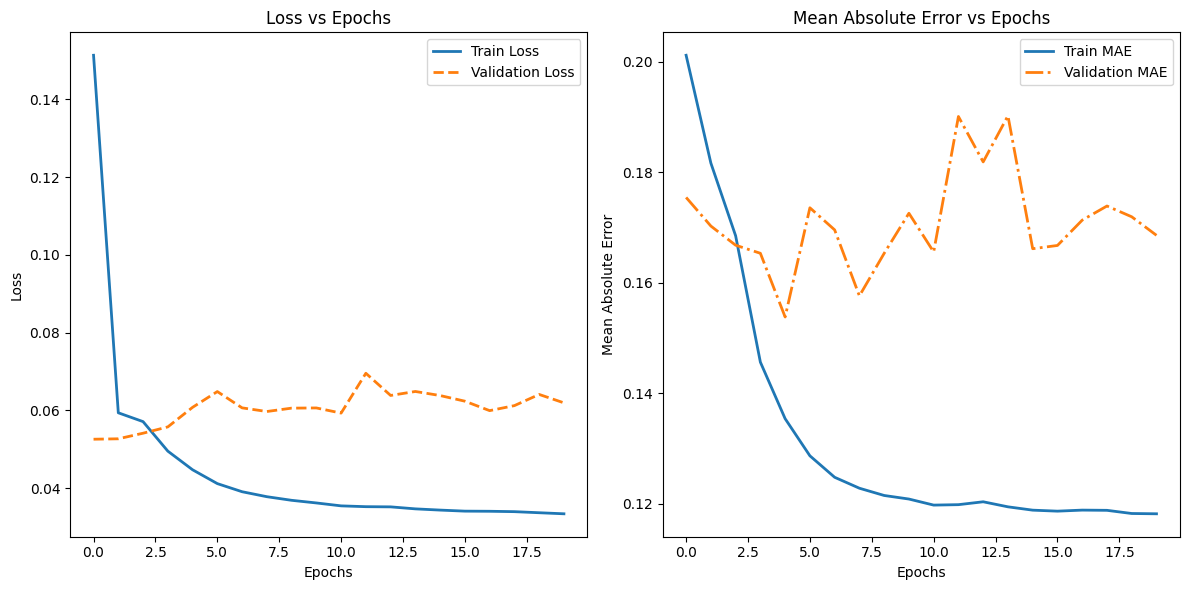

In [ ]:
import matplotlib.pyplot as plt

# Mengambil data dari history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']  # Ganti dengan 'mae'
val_mae = history.history['val_mae']  # Ganti dengan 'val_mae'

# Membuat grafik untuk loss
plt.figure(figsize=(12, 6))

# Subplot untuk loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Train Loss', linestyle='-', linewidth=2)  # Garis solid
plt.plot(val_loss, label='Validation Loss', linestyle='--', linewidth=2)  # Garis putus-putus
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot untuk MAE
plt.subplot(1, 2, 2)
plt.plot(mae, label='Train MAE', linestyle='-', linewidth=2)  # Garis solid
plt.plot(val_mae, label='Validation MAE', linestyle='-.', linewidth=2)  # Garis titik-dash
plt.title('Mean Absolute Error vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


Grafik ini menggambarkan perkembangan performa model selama pelatihan dalam 20 epoch dengan dua metrik evaluasi, yaitu Loss dan Mean Absolute Error (MAE), untuk data pelatihan (train) dan validasi (validation). Pada grafik Loss vs Epochs, terlihat bahwa train loss (garis biru) menurun tajam pada awal pelatihan hingga epoch ke-3, lalu secara bertahap menurun hingga stabil di sekitar nilai 0.03. Sebaliknya, validation loss (garis oranye) menunjukkan tren yang stagnan di sekitar 0.06 dengan sedikit fluktuasi, yang mengindikasikan bahwa model mulai mengalami overfitting. Model tampaknya belajar dengan baik pada data pelatihan, tetapi tidak menunjukkan peningkatan yang berarti pada data validasi.

Sementara itu, pada grafik Mean Absolute Error vs Epochs, train MAE (garis biru) mengalami penurunan signifikan di awal pelatihan dan stabil pada nilai sekitar 0.12, mencerminkan performa yang baik pada data pelatihan. Di sisi lain, validation MAE (garis oranye) berfluktuasi cukup tajam di sepanjang epoch, berada di kisaran 0.16 hingga 0.18. Pola fluktuasi ini memperkuat indikasi bahwa model tidak mampu melakukan generalisasi dengan baik pada data validasi, meskipun performa pada data pelatihan cukup baik.



**4. Evaluasi Model**

In [ ]:
# Prediksi untuk Test set
y_pred_normalized = model.predict([X_test['PlaceID_encoded'], X_test['ReviewerId_encoded']]).flatten()

# Kembalikan prediksi ke skala 1-5
y_pred = (y_pred_normalized * 4) + 1  # Kembali ke rentang 1-5

# Hitung RMSE dan MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")




203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE: 0.9893
MAE: 0.6807


nilai evaluasi dari
RMSE: 0.9893
MAE: 0.6807
menunjukkan model telah bekerja dengan baik

In [ ]:
# Tampilkan prediksi rating yang dikembalikan dalam skala 1-5
X_test['Predicted_Rating'] = y_pred
X_test['Nama_tempat_wisata'] = data_cleaned['Nama_tempat_wisata']

# Urutkan berdasarkan rating tertinggi
top_5_recommendations = X_test.sort_values(by='Predicted_Rating', ascending=False).head(5)

print("Top-5 Rekomendasi Tempat Wisata:")
print(top_5_recommendations[['Nama_tempat_wisata', 'Predicted_Rating']])


Top-5 Rekomendasi Tempat Wisata:
                                      Nama_tempat_wisata  Predicted_Rating
41099                   Pantai Bebas Parapat, Danau Toba          4.880996
31865                         Bukit Indah Simarjarunjung          4.880996
30886                                   Geosite Sipinsur          4.880996
24050                                     Taman Eden 100          4.880996
20814  Batu Kursi Raja Siallagan ( Stone Chair of Kin...          4.880996


berdasarkan hasil prediksi model rekomendasi, berikut adalah Top-5 rekomendasi tempat wisata beserta predicted rating masing-masing tempat wisata yang memiliki nilai serupa, yaitu 4.880996.
Prediksi rating sebesar 4.880996 untuk kelima tempat wisata menunjukkan bahwa model merekomendasikan destinasi ini karena diperkirakan memiliki tingkat kepuasan pengunjung yang tinggi. Tempat-tempat tersebut tidak hanya menawarkan keindahan alam tetapi juga nilai budaya dan edukasi, sehingga menjadi pilihan utama dalam daftar rekomendasi.

In [ ]:
# Tampilkan prediksi rating yang dikembalikan dalam skala 1-5
X_test['Predicted_Rating'] = y_pred
X_test['Nama_tempat_wisata'] = data_cleaned['Nama_tempat_wisata']

# Urutkan berdasarkan rating tertinggi dan ambil Top 10
top_10_recommendations = X_test.sort_values(by='Predicted_Rating', ascending=False).head(10)

# Menampilkan Top-10 Rekomendasi Tempat Wisata
print("Top-10 Rekomendasi Tempat Wisata:")
print(top_10_recommendations[['Nama_tempat_wisata', 'Predicted_Rating']])


Top-10 Rekomendasi Tempat Wisata:
                                      Nama_tempat_wisata  Predicted_Rating
41099                   Pantai Bebas Parapat, Danau Toba          4.880996
31865                         Bukit Indah Simarjarunjung          4.880996
30886                                   Geosite Sipinsur          4.880996
24050                                     Taman Eden 100          4.880996
20814  Batu Kursi Raja Siallagan ( Stone Chair of Kin...          4.880996
30059                              Bukit Holbung Samosir          4.880996
39653                       Pertunjukan Tari Sigale Gale          4.880996
2290                        Istana Raja Sisingamangaraja          4.880996
16793                                        Pasar Tomok          4.880996
32958                                Menara Pandang Tele          4.880996


In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score
import numpy as np

# Menetapkan threshold untuk rating "positif"
threshold = 3.0

# Konversi prediksi dan nilai asli menjadi "positif" atau "negatif"
y_test_binary = (y_test > threshold).astype(int)  # 1 jika rating asli > threshold, 0 jika tidak
y_pred_binary = (y_pred > threshold).astype(int)  # 1 jika rating prediksi > threshold, 0 jika tidak

# Menghitung Precision dan Recall
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.8827
Recall: 0.9700


In [ ]:
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Menetapkan threshold untuk rating "positif"
threshold = 3.0

# Konversi prediksi dan nilai asli menjadi "positif" atau "negatif" untuk Precision & Recall
y_test_binary = (y_test.values > threshold).astype(int)  # 1 jika rating asli > threshold, 0 jika tidak
y_pred_binary = (y_pred > threshold).astype(int)  # 1 jika rating prediksi > threshold, 0 jika tidak


# Mean Average Precision at K (MAP@K)
def mean_average_precision_at_k(y_true, y_pred, k=10):
    """
    Menghitung Mean Average Precision at K (MAP@K)
    y_true: array of true labels (binary relevances)
    y_pred: array of predicted scores (skor kontinu)
    k: number of top recommendations to consider
    """
    # Urutkan prediksi berdasarkan nilai prediksi (untuk setiap pengguna)
    top_k_preds = np.argsort(y_pred)[::-1][:k]  # Menyortir prediksi dari yang terbesar
    y_true_top_k = np.take(y_true, top_k_preds)  # Mengambil nilai y_true yang sesuai dengan top_k_preds

    # Hitung presisi rata-rata untuk top-k
    average_precision = 0
    for i in range(1, k+1):
        if y_true_top_k[i-1] == 1:  # Menghitung presisi untuk setiap item relevan
            average_precision += 1  # Jika relevan, hitung presisi 1 (karena kita hanya memeriksa relevansi)

    return average_precision / k

# Menghitung MAP untuk top 10 rekomendasi
map_score = mean_average_precision_at_k(y_test_binary, y_pred, k=10)
print(f"MAP@10: {map_score:.4f}")




MAP@10: 0.8000


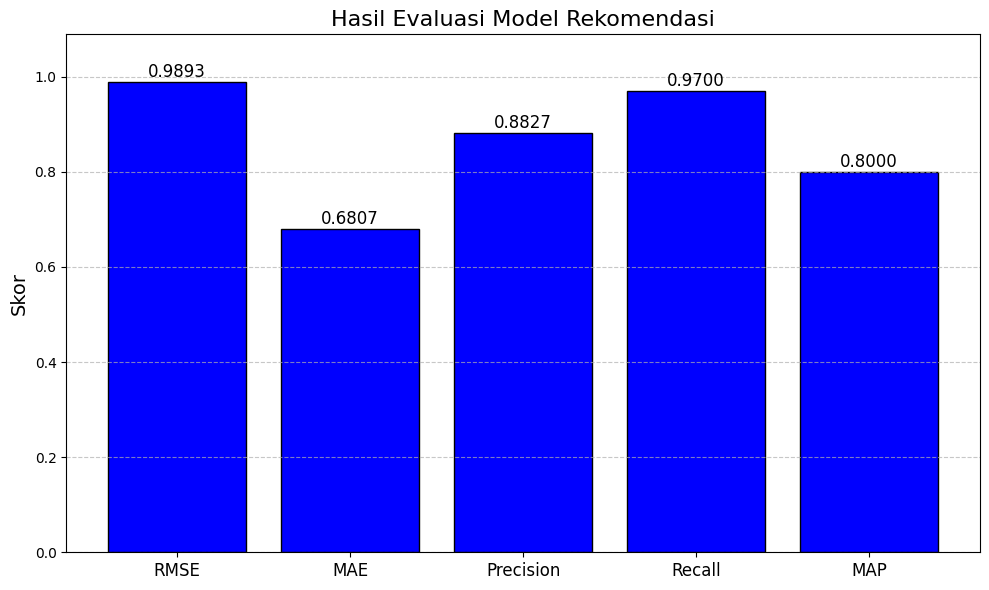

In [ ]:
import matplotlib.pyplot as plt

# Hasil evaluasi model
evaluation_metrics = {
    "RMSE": rmse,
    "MAE": mae,
    "Precision": precision,
    "Recall": recall,
    "MAP": map_score
}

# Membuat plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(evaluation_metrics.keys(), evaluation_metrics.values(), color='blue', edgecolor='black')

# Menambahkan anotasi nilai di atas batang
for i, v in enumerate(evaluation_metrics.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Konfigurasi plot
plt.title("Hasil Evaluasi Model Rekomendasi", fontsize=16)
plt.ylabel("Skor", fontsize=14)
plt.ylim(0, max(evaluation_metrics.values()) + 0.1)  # Menyesuaikan batas atas agar nilai anotasi tidak terpotong
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()
